### The dataset can be downloaded from:
### https://gist.githubusercontent.com/piffall/678b3611c9f4646c902970a6aa5db8fb/raw/edea1303520d0ec62797c092a6e5d07ce4f24818/breastdata.txt
### Screening of cell tissue is extremely important to detect tumors. This dataset contains measurements of cell properties derived from a digitalised image of cell nuclei of breast cells for 569 samples. Each sample also contains a diagnosis as benign or malignant. In particular, the dataset breastdata.txt contains the variables listed below. 

#### - ID: ID of the register
#### - Diagnosis: M = malignant, B = benign
#### - Radius: mean of distances from center to points on the perimeter
#### - Texture: standard deviation of gray-scale values
#### - Perimeter: Average perimeter of nuclei
#### - Area: Average area of nuclei
#### - Smoothness: local variation in radius lengths
#### - Compactness: Average of perimeter 2 / area - 1.0
#### - Concavity: average severity of concave portions of the contour
#### - Concave points: average number of concave portions of the contour
#### - Symmetry: average symmetry measure of nuclei
#### - Fractal dimension: ”coastline approximation” – 1

# 1. Loading the dataset and performing descriptive analytics

In [147]:
#Import libraries for exploratory analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [148]:
#Load dataset and rename some columns
df = pd.read_csv("https://gist.githubusercontent.com/piffall/678b3611c9f4646c902970a6aa5db8fb/raw/", delimiter = " ")
df.rename(columns={"concave points": "concave_points", "fractal dimension": "fractal_dimension"}, inplace = True)
print(df)
df.dropna(inplace = True) #Check if there are null values in the dataset (there are no null values) 
print(df)

#Analytical description of numerical variables
df.describe().T

           ID Diagnosis  radius  texture  perimeter    area  smoothness  \
0      842302         M   17.99    10.38     122.80  1001.0     0.11840   
1      842517         M   20.57    17.77     132.90  1326.0     0.08474   
2    84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3    84348301         M   11.42    20.38      77.58   386.1     0.14250   
4    84358402         M   20.29    14.34     135.10  1297.0     0.10030   
..        ...       ...     ...      ...        ...     ...         ...   
564    926424         M   21.56    22.39     142.00  1479.0     0.11100   
565    926682         M   20.13    28.25     131.20  1261.0     0.09780   
566    926954         M   16.60    28.08     108.30   858.1     0.08455   
567    927241         M   20.60    29.33     140.10  1265.0     0.11780   
568     92751         B    7.76    24.54      47.92   181.0     0.05263   

     compactness  concavity  concave_points  symmetry  fractal_dimension  
0        0.27760    0.30

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.00000,869218.00000,906024.00000,8.813129e+06,9.113205e+08
radius,569.0,1.412729e+01,3.524049e+00,6.98100,11.70000,13.37000,1.578000e+01,2.811000e+01
texture,569.0,1.928965e+01,4.301036e+00,9.71000,16.17000,18.84000,2.180000e+01,3.928000e+01
perimeter,569.0,9.196903e+01,2.429898e+01,43.79000,75.17000,86.24000,1.041000e+02,1.885000e+02
area,569.0,6.548891e+02,3.519141e+02,143.50000,420.30000,551.10000,7.827000e+02,2.501000e+03
smoothness,569.0,9.636028e-02,1.406413e-02,0.05263,0.08637,0.09587,1.053000e-01,1.634000e-01
compactness,569.0,1.043410e-01,5.281276e-02,0.01938,0.06492,0.09263,1.304000e-01,3.454000e-01
concavity,569.0,8.879932e-02,7.971981e-02,0.00000,0.02956,0.06154,1.307000e-01,4.268000e-01
concave_points,569.0,4.891915e-02,3.880284e-02,0.00000,0.02031,0.03350,7.400000e-02,2.012000e-01
symmetry,569.0,1.811619e-01,2.741428e-02,0.10600,0.16190,0.17920,1.957000e-01,3.040000e-01


# 2. Building data visualizations with Python to help understanding which variables have an impact on heart disease

<AxesSubplot:>

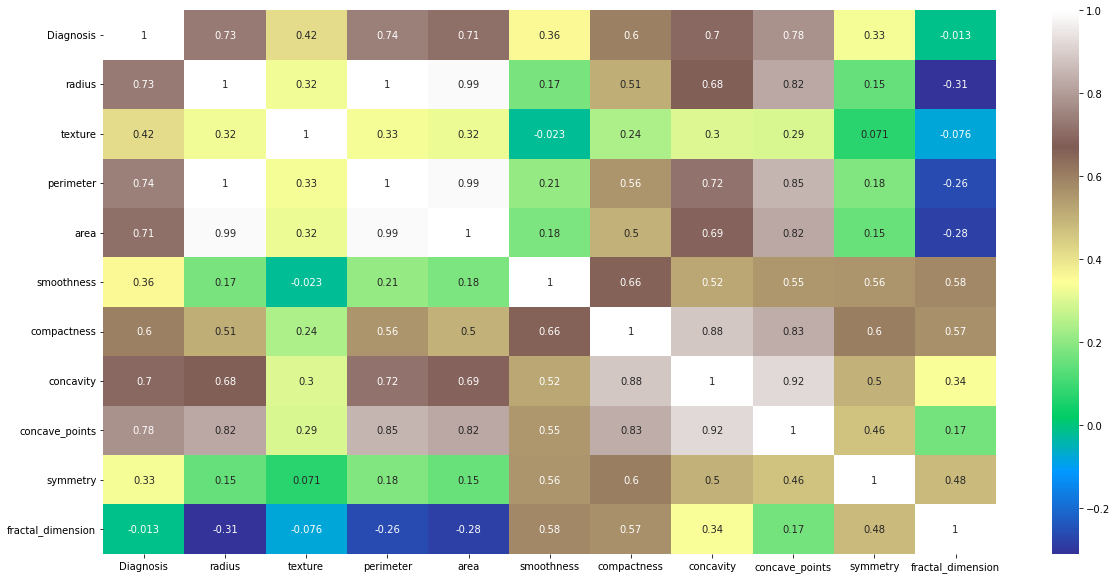

In [150]:
#Convert the categorical variable Diagnosis to numerical variable and generate correlation matrix
mapper = {'B':0, 'M':1} # Mapping bening cells as B and malignant cells as M
def encoder(val):
    return mapper[val]

df2['Diagnosis'] = df2['Diagnosis'].apply(encoder)

plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot=True, cmap='terrain')

### In the correlation plot above we can see a strong correlation of the variable Diagnosis with Radius, Perimeter, Area, Concavity and Concave points

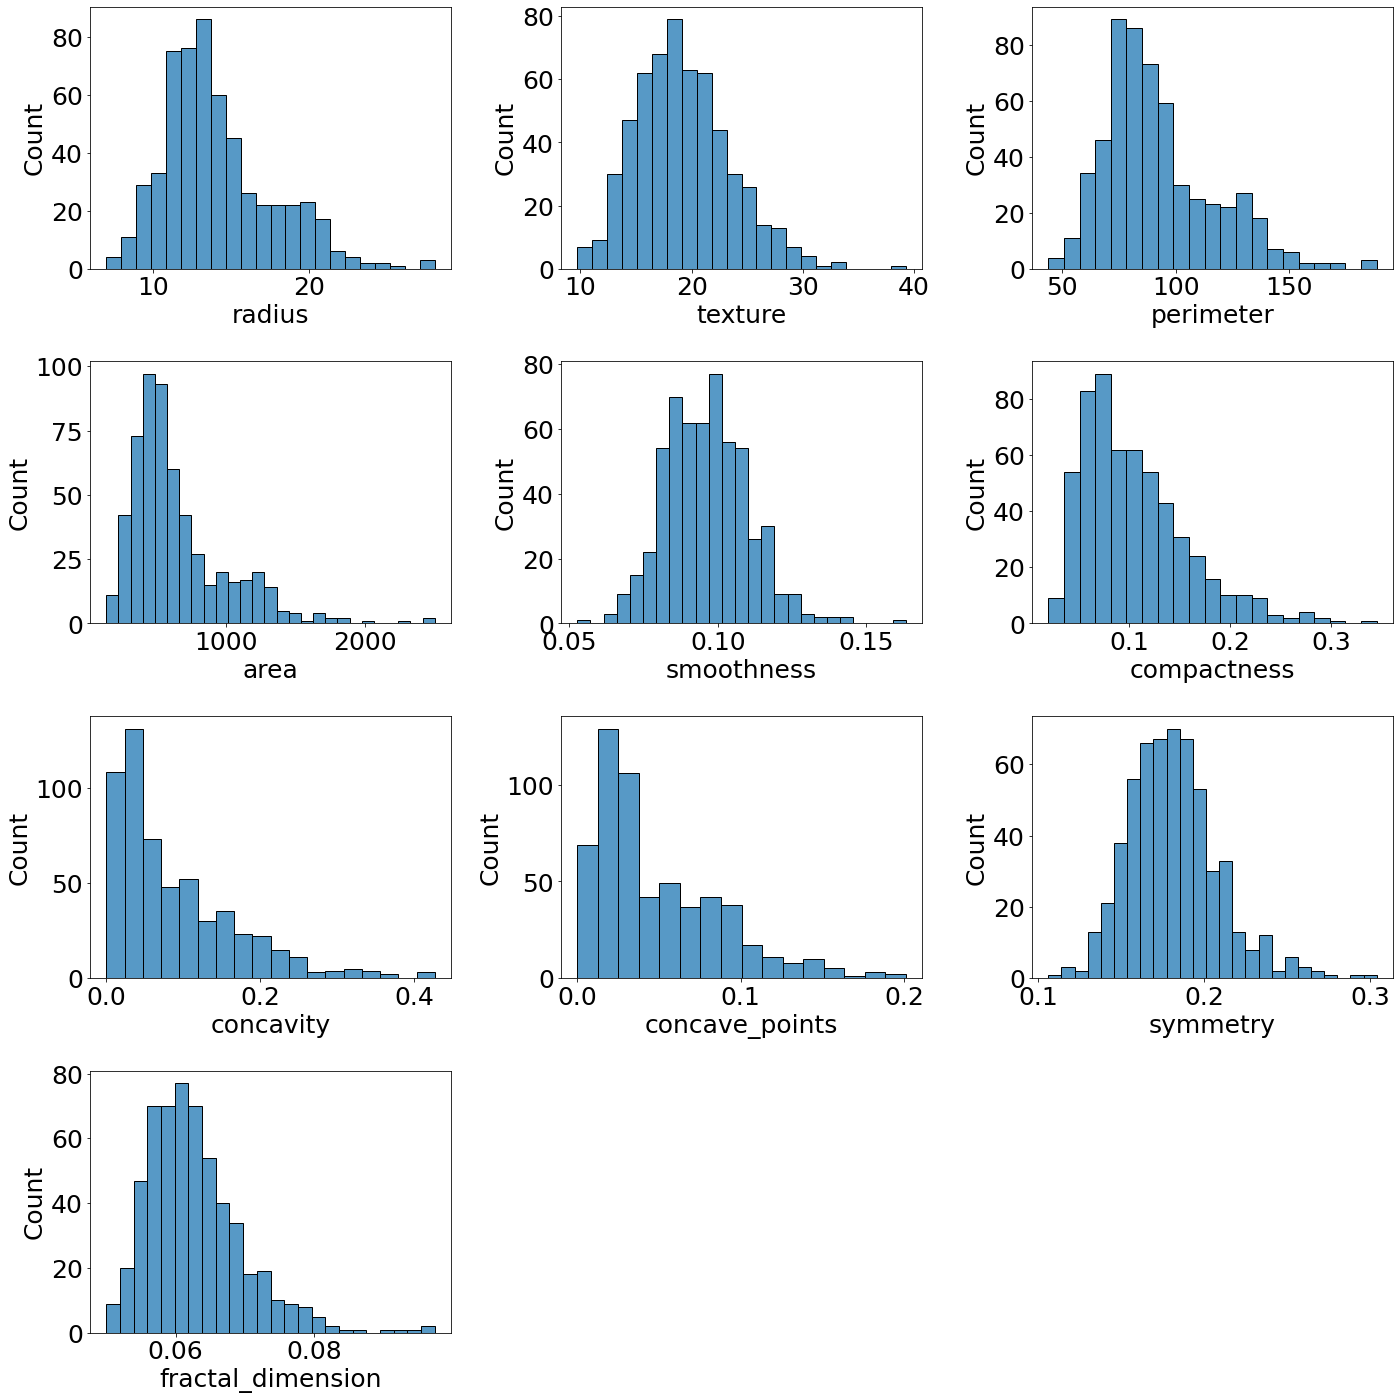

In [275]:
#Plot the value distribution of the numerical variables of the dataset
numerical = df2.drop(columns = "Diagnosis")

plt.figure(figsize=(20,20))
index = 0
for index, feature in enumerate(numerical):
    index += 1
    plt.subplot(4, 3, index)
    plt.tight_layout()
    sns.histplot(numerical[feature])

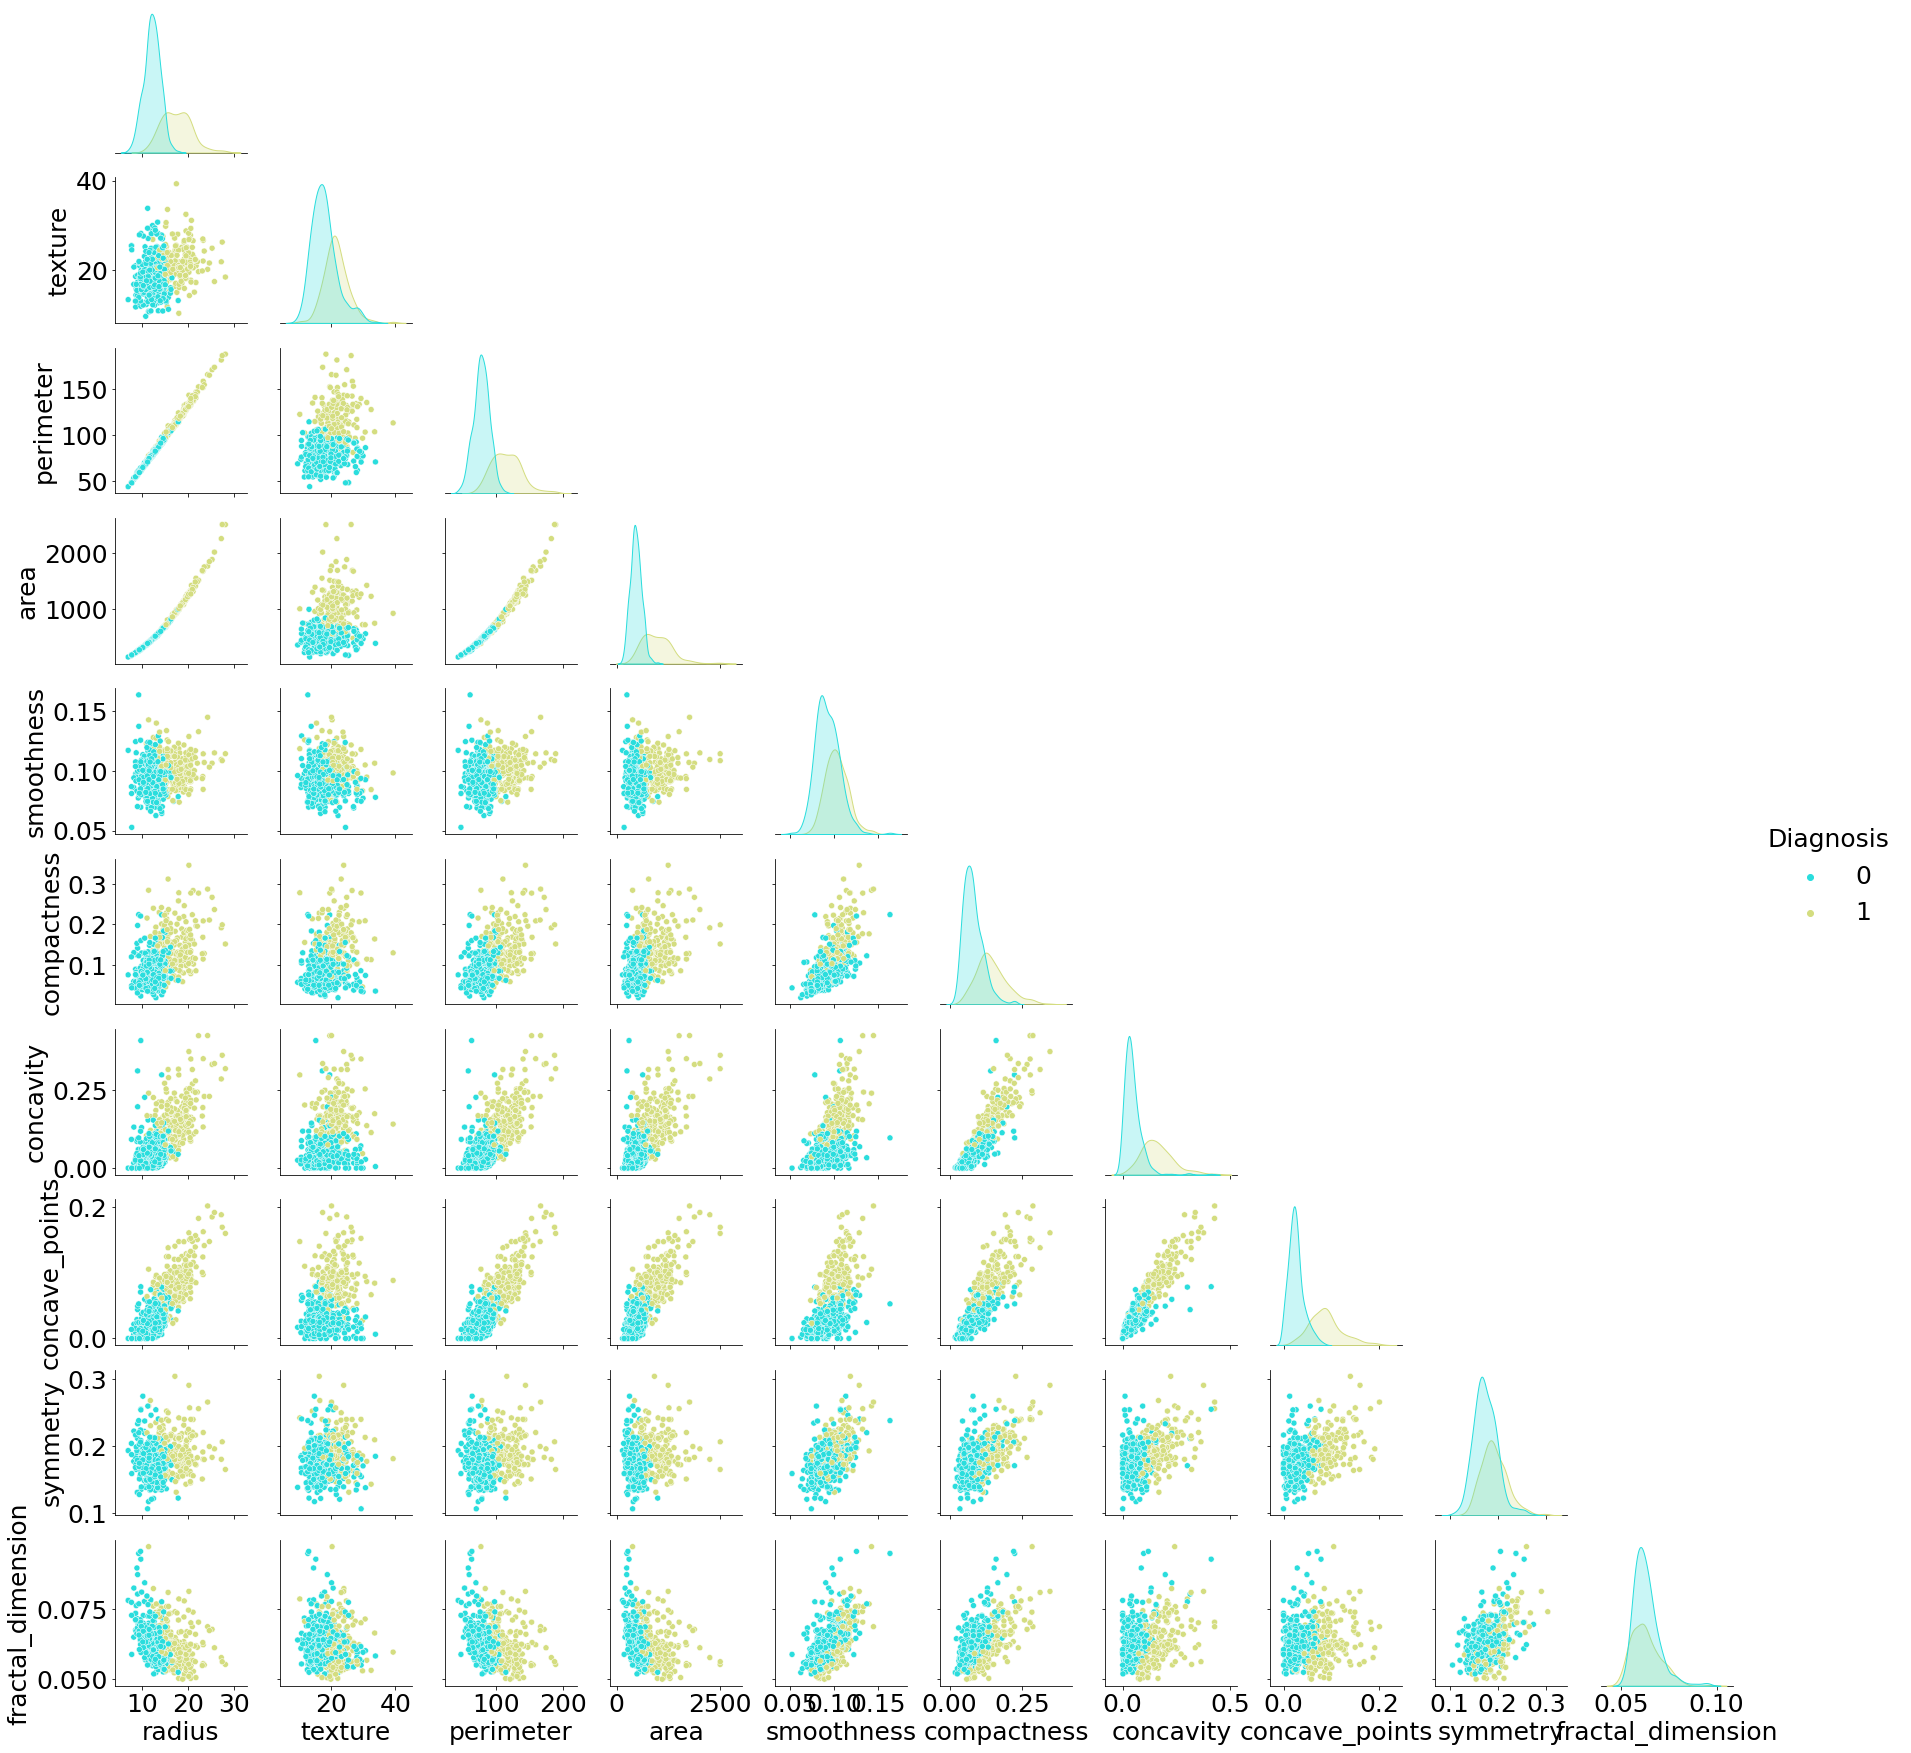

In [276]:
#Visualize the value distribution of each pair of numerical variables and color bases on Diagnosis
sns.pairplot(df2, hue="Diagnosis", palette="rainbow", corner=True)

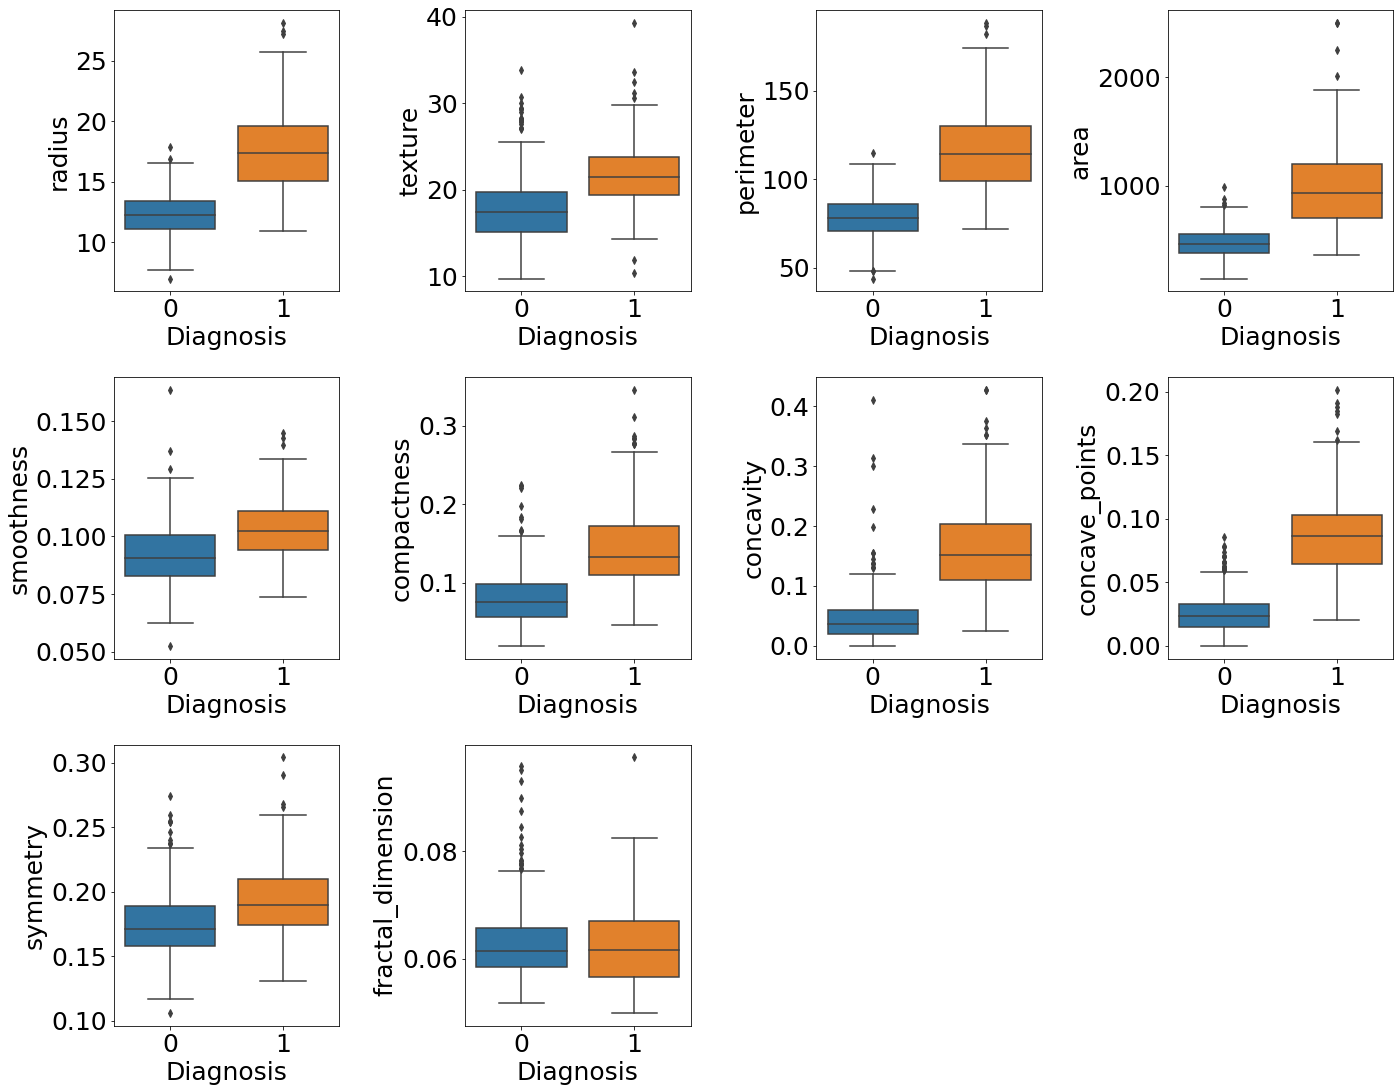

In [292]:
#Boxplot analysis of the influence of numeric variables on heart disease.
index = 0
plt.figure(figsize=(20,20))
for feature in df2:
    if feature != "Diagnosis":
        index += 1
        plt.subplot(4, 4, index)
        plt.tight_layout()
        sns.boxplot(x='Diagnosis', y=feature, data=df2)

### The boxplot above shows that the variables Radius, Perimeter, Area, Concavity and Concave_points are, in principle, good variables to differentiate between bening and malignant breast cells

In [156]:
#Assesing multicollinearity with Variable Inflation Factors (VIF)

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Construcción de la matriz para la regresión lineal usando Species como variable respuesta
y, X = dmatrices('Diagnosis ~ radius+texture+perimeter+area+smoothness+compactness+concavity+concave_points+symmetry+fractal_dimension', data=df2, return_type='dataframe')

#Cálculo del VIF para cada variable numérica que queremos usar para predecir la variable Species
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,1306.240796,Intercept
1,1606.805835,radius
2,1.186978,texture
3,1956.135364,perimeter
4,56.283984,area
5,2.957080,smoothness
6,22.619498,compactness
7,11.715217,concavity
8,21.711976,concave_points
9,1.778451,symmetry


### From the VIF analysis above we can conclude that the variables Radius and Perimeter show very high multicollinearity. As they are directly related to the variable Area, of much lower VIF, we can safely ignore Radius and Perimeter in the generation of the predictive model. Similarly, the variables Concavity and Concave_points are intimately related, explaining the same type of feature of the cell. Hence, we can safely ignore the variable with higher VIF, this is, Concave_points.

# 3. Building a classification model to predict the type of breast cell (malignant or bening) from morphological variables

In [199]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [314]:
# Selection of dependent and independent variables and generation of training and test datasets 
X = df2.drop(["Diagnosis", "perimeter", "radius", "concave_points"], axis=1) #Selection of the independent variables used for prediction
y = df2["Diagnosis"] #Selection of the variable to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 40)
print(X)

     texture    area  smoothness  compactness  concavity  symmetry  \
0      10.38  1001.0     0.11840      0.27760    0.30010    0.2419   
1      17.77  1326.0     0.08474      0.07864    0.08690    0.1812   
2      21.25  1203.0     0.10960      0.15990    0.19740    0.2069   
3      20.38   386.1     0.14250      0.28390    0.24140    0.2597   
4      14.34  1297.0     0.10030      0.13280    0.19800    0.1809   
..       ...     ...         ...          ...        ...       ...   
564    22.39  1479.0     0.11100      0.11590    0.24390    0.1726   
565    28.25  1261.0     0.09780      0.10340    0.14400    0.1752   
566    28.08   858.1     0.08455      0.10230    0.09251    0.1590   
567    29.33  1265.0     0.11780      0.27700    0.35140    0.2397   
568    24.54   181.0     0.05263      0.04362    0.00000    0.1587   

     fractal_dimension  
0              0.07871  
1              0.05667  
2              0.05999  
3              0.09744  
4              0.05883  
..       

In [315]:
# Monitorisation of the Mean Square Error with respect to the number of trees used in Random Forest model

rf = RandomForestRegressor(n_estimators=1)
mse_train_list = []
mse_test_list = []

for iter in range(51):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train = sklearn.metrics.mean_squared_error(y_train, y_train_predicted)
    mse_test = sklearn.metrics.mean_squared_error(y_test, y_test_predicted)
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    rf.n_estimators += 1

mse_train_df = pd.DataFrame(mse_train_list, columns = ['MSE_train'])
mse_train_trees = mse_train_df.index + 1
mse_test_df = pd.DataFrame(mse_test_list, columns = ['MSE_test'])
mse_test_trees = mse_test_df.index + 1


Iteration: 0 Train mse: 0.022613065326633167 Test mse: 0.08771929824561403
Iteration: 1 Train mse: 0.032035175879396985 Test mse: 0.06578947368421052
Iteration: 2 Train mse: 0.012841987716359577 Test mse: 0.04873294346978558
Iteration: 3 Train mse: 0.012719849246231155 Test mse: 0.0625
Iteration: 4 Train mse: 0.01085427135678392 Test mse: 0.04865497076023392
Iteration: 5 Train mse: 0.009073143495254048 Test mse: 0.05912930474333983
Iteration: 6 Train mse: 0.010870679930263564 Test mse: 0.04678362573099415
Iteration: 7 Train mse: 0.009225816582914572 Test mse: 0.05299707602339181
Iteration: 8 Train mse: 0.009709039022271854 Test mse: 0.04952710995595986
Iteration: 9 Train mse: 0.00814070351758794 Test mse: 0.0416374269005848
Iteration: 10 Train mse: 0.00843058266539308 Test mse: 0.050843361848146536
Iteration: 11 Train mse: 0.007258514796203239 Test mse: 0.04942332683560754
Iteration: 12 Train mse: 0.007745829740418066 Test mse: 0.050589985812657876
Iteration: 13 Train mse: 0.0082812019

In [316]:
#Define function to plot Mean Square Error of Train and Test Data vs Number of Trees
def plot_mse(mse_train_trees, mse_test_trees, mse_train_df, mse_test_df, xlabel='Number of Trees', ylabel='Mean Square Error', dpi=300):
    plt.rcParams["figure.figsize"] = [20, 10]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['font.size'] = '25'
    plt.figure(figsize=(12,5), dpi=dpi)
    fig, ax = plt.subplots()
    plt.plot(mse_train_trees, mse_train_df, '-o', label = 'Train Data')
    plt.plot(mse_test_trees, mse_test_df, '-o', label = 'Test Data')
    plt.xlim(0, 55)
    plt.ylim(0, 0.08)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc = 'upper right')
    plt.show()

<Figure size 3600x1500 with 0 Axes>

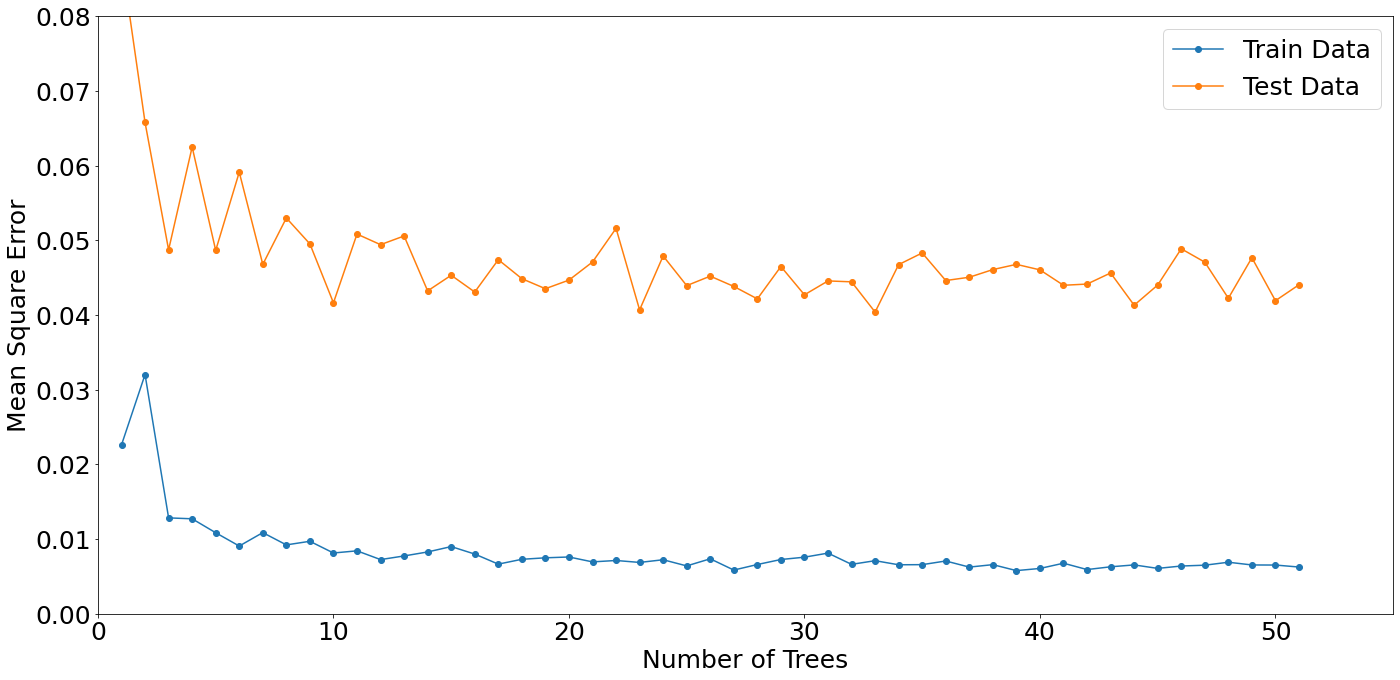

In [317]:
#Plot RMS vs number of tress for the train and test datasets
#CONCLUSION: The overfitting does not increase by adding more trees to the RF model. It stabilizes with more trees.
plot_mse(mse_train_trees, mse_test_trees, mse_train_df, mse_test_df, xlabel='Number of Trees', ylabel='Mean Square Error', dpi=300)

>1, train: 0.917, test: 0.947
>2, train: 0.950, test: 0.918
>3, train: 0.970, test: 0.953
>4, train: 0.985, test: 0.947
>5, train: 0.990, test: 0.947
>6, train: 0.995, test: 0.942
>7, train: 0.997, test: 0.930
>8, train: 1.000, test: 0.947
>9, train: 1.000, test: 0.947
>10, train: 1.000, test: 0.942
>11, train: 1.000, test: 0.947
>12, train: 1.000, test: 0.953
>13, train: 1.000, test: 0.947
>14, train: 1.000, test: 0.942
>15, train: 1.000, test: 0.953
>16, train: 1.000, test: 0.942
>17, train: 1.000, test: 0.936
>18, train: 1.000, test: 0.947
>19, train: 1.000, test: 0.947
>20, train: 1.000, test: 0.930


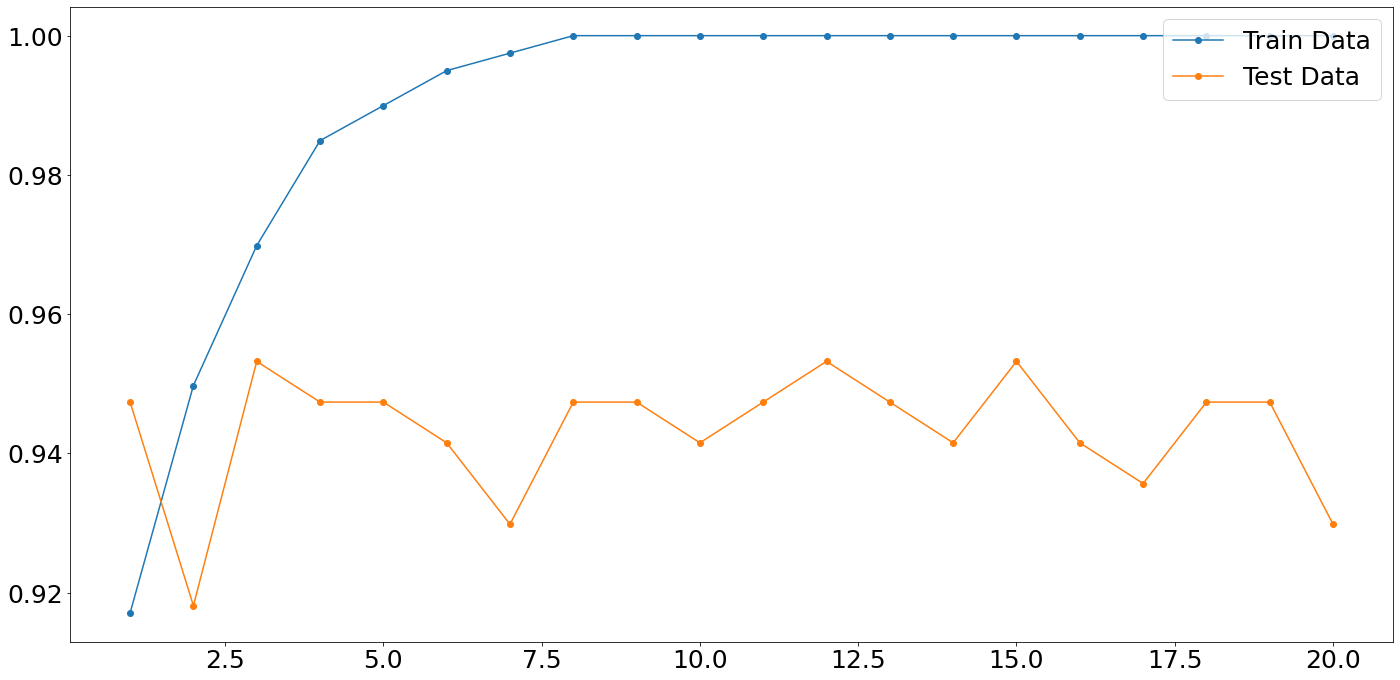

In [328]:
#Evaluate RF overfitting of training dataset by monitoring the accuracy of the model as a function of RF depth

train_scores, test_scores = list(), list() # define lists to collect scores

values = [i for i in range(1, 21)] # define the tree depths to evaluate
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    rfmodel = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    rfmodel.fit(X_train, y_train)
    # evaluate on the train dataset
    train_y_pred = rfmodel.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_y_pred = rfmodel.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train Data')
plt.plot(values, test_scores, '-o', label='Test Data')
plt.legend(loc = 'upper right')
plt.show()

In [330]:
# Run Random Forest model with 30 trees and max_depth = 4 to avoid overfitting of training dataset
rf = RandomForestClassifier(n_estimators=30, criterion = 'entropy', random_state=50, class_weight='balanced', max_depth=4)
rfmodel = rf.fit(X_train, y_train)

y_train_predicted = rfmodel.predict(X_train)
y_test_predicted = rfmodel.predict(X_test)
mse_train = sklearn.metrics.mean_squared_error(y_train, y_train_predicted)
mse_test = sklearn.metrics.mean_squared_error(y_test, y_test_predicted)
print("Random Forest - Train MSE: {}; Test MSE: {}".format(mse_train, mse_test))
rfaccuracy = accuracy_score(y_test,y_test_predicted)
print(f'The accuracy of the Random Forest model is: {rfaccuracy}')

Random Forest - Train MSE: 0.017587939698492462; Test MSE: 0.05263157894736842
The accuracy of the Random Forest model is: 0.9473684210526315


In [299]:
# Logistic Regression model
lr=LogisticRegression(max_iter=10000)
lrmodel=lr.fit(X_train,y_train)

y_train_predicted = lrmodel.predict(X_train)
y_test_predicted = lrmodel.predict(X_test)
mse_train = sklearn.metrics.mean_squared_error(y_train, y_train_predicted)
mse_test = sklearn.metrics.mean_squared_error(y_test, y_test_predicted)
print("Logistic Regression - Train MSE: {}; Test MSE: {}".format(mse_train, mse_test))

lraccuracy = accuracy_score(y_test,y_test_predicted)
lrcoefficients = lr.coef_[0]

print(f'The accuracy of the Logistic Regression model is: {lraccuracy}')
# Lista de coeficientes que indican la contribución de cada variable al modelo de predicción, 
# siguiendo el orden de las variables en el dataframe X
print(f'The coefficients of the Logistic Regression model are: {lrcoefficients}') 


Logistic Regression - Train MSE: 0.09296482412060302; Test MSE: 0.13450292397660818
The accuracy of the Logistic Regression model is: 0.8654970760233918
The coefficients of the Logistic Regression model are: [0.22730632 0.01211623 0.47994818 1.37215678 2.02836646 0.73582043
 0.17429918]


### The Random Forest classification model performs better than Logistic Regression (accuracy of 95% and 87%, respectively). However, Logistic Regression (LR) models have the advantage of being easier to interpret as they output a mathematical expression with the contribution of each independent variable to the prediction. Thus, to predict the variable Diagnosis the LR model takes the form: Diagnosis = 0.23Texture + 0.01Area + 0.48Smoothness + 1.37Compactness + 2.03Concavity + 0.74Symmetry + 0.17Fractal_dimension. We can inmediately see from this formula that Concavity is a key parameter to predict the type of breast cell, as we anticipated from the boxplot visualization above. In addition, the 87% accuracy of the LR model is a very good accuracy value. Hence, the LR model is a very good and comprehensible model to screen breast cells. 